# STAT201 Group Project Report
# Parent's Educational Attainment and Children's Intellectual Development

*Jack Yao, Jessie Lu, Kexin Feng, Vincent Luong*

# Introduction

Student Performance is a general term used to describe how well a student has mastered what is taught in school. In our experiment, we will use students' grades to quantify student performance and ultimately intellect. Although countless factors contribute to a student's academic performance, for simplicity we will assume performance on mathematics is representative of the student's performance; a study published in 2019 [(Mammarella et al., 2019)](#ref_2) explores the impact of parents' attitudes and behaviors towards math on their child's mathematic performance. There was evidence that parents majoring in elementary education tend to have higher math anxiety than those attending college. Another study [(Muhammad et al., 2020)](#ref_3) also suggests that the high education of father and mother positively contributes to their children's academic achievement. Our research is inspired by these findings, aiming to investigate the relationship between parental education and the child's mathematic performance.

The dataset [(2014)](#ref_1) that will be used in this project is the Student Performance on Math dataset from the UCI machine learning repository. This project will conduct a hypothesis test to determine whether the difference between the mean (mathematic) student performance of "well-educated" and "less-educated" parents is statistically significant. The classification of parents’ level of education is determined in the preliminary analysis. The measured student performance is reflected in grades on a numeric scale from $0$ to $20$. 

### Research Question:
Is the mean (mathematic) student performance of those with well-educated parents greater than that of those with less-education parents.

$H_0: \mu_1 - \mu_2 = 0$

$H_1: \mu_1 - \mu_2 > 0$

$\mu_1$: Student performance of well-educated parents’ group.

$\mu_2$: Student performance of less-educated parents’ group. 

# Preliminary Analysis

This section will involve:
- Reading data from UCI database
- Cleaning and wrangling data
- Plotting relevant raw data
- Computing point estimates

In [1]:
# load libraries and set seed
set.seed(8888)
library(tidyverse)
library(tidymodels)
library(infer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.3     ✔ workflows    1.0.0
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.1     ✔ yardstick    1.1.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() ma

### Reading and cleaning data from database

In [2]:
# Reading data from UCI Machine Learning Repository and extract CSV file from zip file
url <- "https://archive.ics.uci.edu/static/public/320/student+performance.zip"
download.file(url, "./data/studentperformance.zip")
raw_data <- unzip("./data/studentperformance.zip", "student.zip", exdir = "./data") |>
    unzip("student-mat.csv", exdir = "./data") |>
    read_delim(delim = ";")

# Refactoring column names
student_data <- raw_data |>
    select(Medu, Fedu, G1, G2, G3)
colnames(student_data) <- c("mother_education", "father_education", "term_1_grade", "term_2_grade", "final_grade")

head(student_data)

Rows: 395 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mother_education,father_education,term_1_grade,term_2_grade,final_grade
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,4,5,6,6
1,1,5,5,6
1,1,7,8,10
4,2,15,14,15
3,3,6,10,10
4,3,15,15,15


### Plotting and analyzing relevant data

Seen from documentation of the dataset [(2014)](#ref_1), the mother's and father's education levels are as follows:

|Score|Education level|
|-|-|
|$0$|None|
|$1$|up to 4th grade|
|$2$|5th to 9th grade|
|$3$|Secondary education|
|$4$|Postsecondary education|


Below are plots of the distribution of the parents' education scores by assuming the score as numeric rather than categorical:

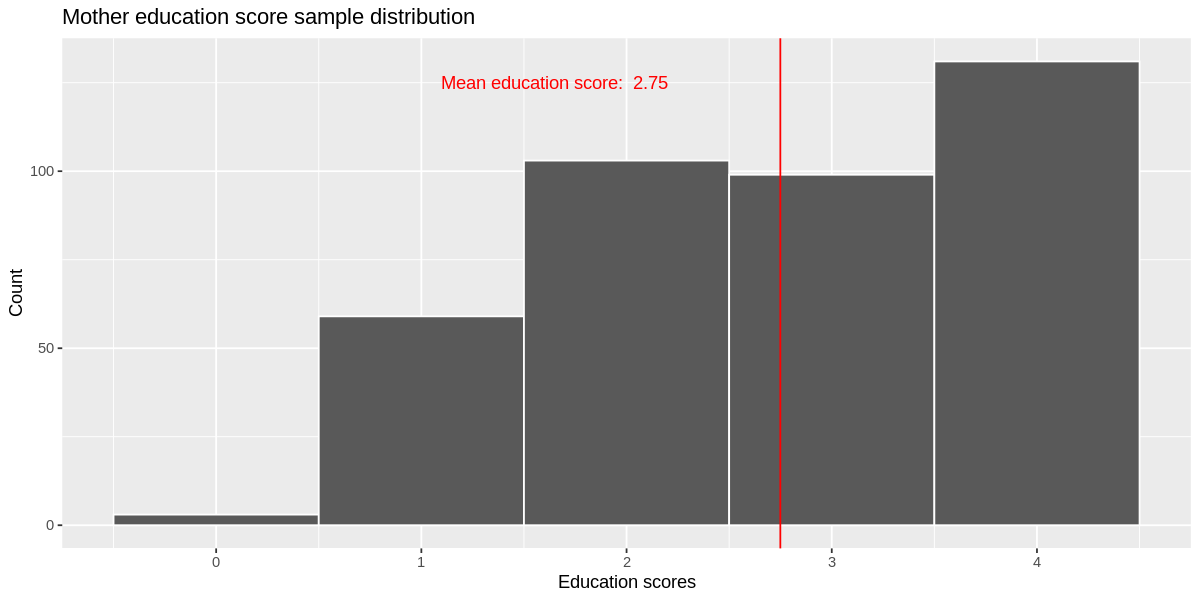

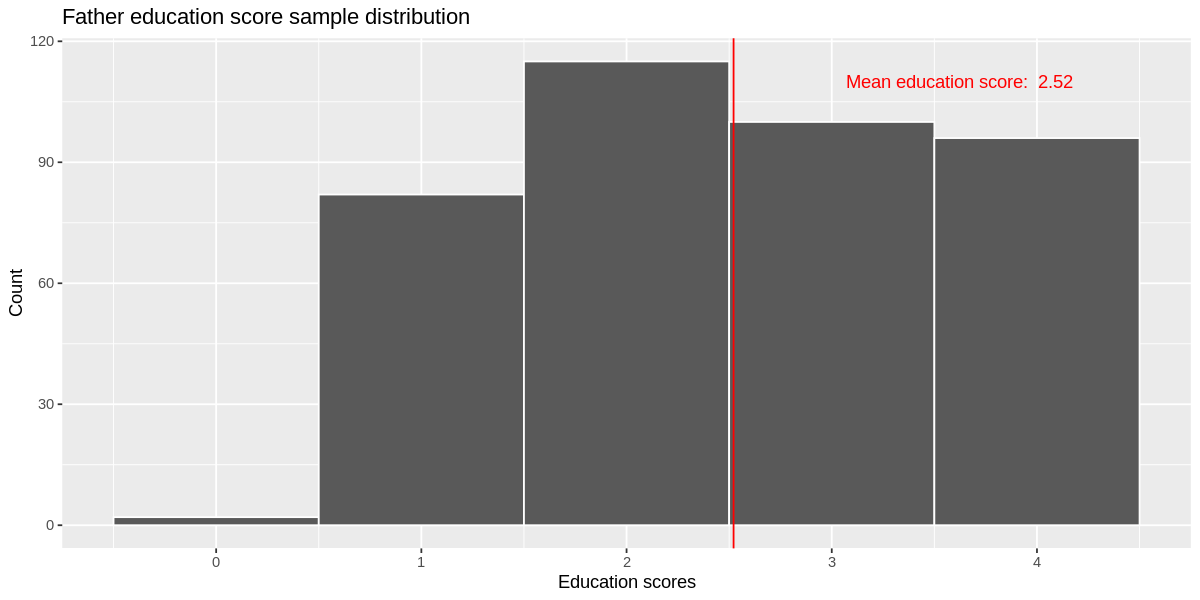

In [3]:
options(repr.plot.width = 10, repr.plot.height = 5)


mother_education_plot <- student_data |>
    ggplot(aes(x = mother_education)) +
    geom_histogram(binwidth = 1, color = 'white') +
    geom_vline(aes(xintercept = mean(mother_education)), color = 'red') +
    annotate("text", label = paste("Mean education score: ", round(mean(student_data$mother_education), digits = 2)), 
             x = mean(student_data$mother_education) - 1.1, y = 125, color = 'red') +
    ggtitle("Mother education score sample distribution") +
    xlab("Education scores") +
    ylab("Count") +
    labs()


father_education_plot <- student_data |>
    ggplot(aes(x = father_education)) +
    geom_histogram(binwidth = 1, color = 'white') +
    geom_vline(aes(xintercept = mean(father_education)), color = 'red') +
    annotate("text", label = paste("Mean education score: ", round(mean(student_data$father_education), digits = 2)), 
             x = mean(student_data$father_education) + 1.1, y = 110, color = 'red') +
    ggtitle("Father education score sample distribution") +
    xlab("Education scores") +
    ylab("Count")

mother_education_plot
father_education_plot

From the plots above, it can be observed that they differ slightly in the shape, but otherwise share similar characteristics; there are very little observations of parents with "no education level" and most of the observations tend towards the upper end with both centers about the score of $2.6$.

With consideration of the fact that they share similar centers, the education scores of the respective parents are summed under the assumption that the individual parent education scores along with the sex of the parent are not respectively significant (e.g. father and mother with score of $5$ and $5$ vs. $1$ and $9$ vs. $9$ and $1$ are equivalent). Under this assumption, the process of classifying "well-education" and "less-educated" parents is simplified and more generalizable without further research beyond the scope of statistics.

Below is the distribution of the combined parents education scores:

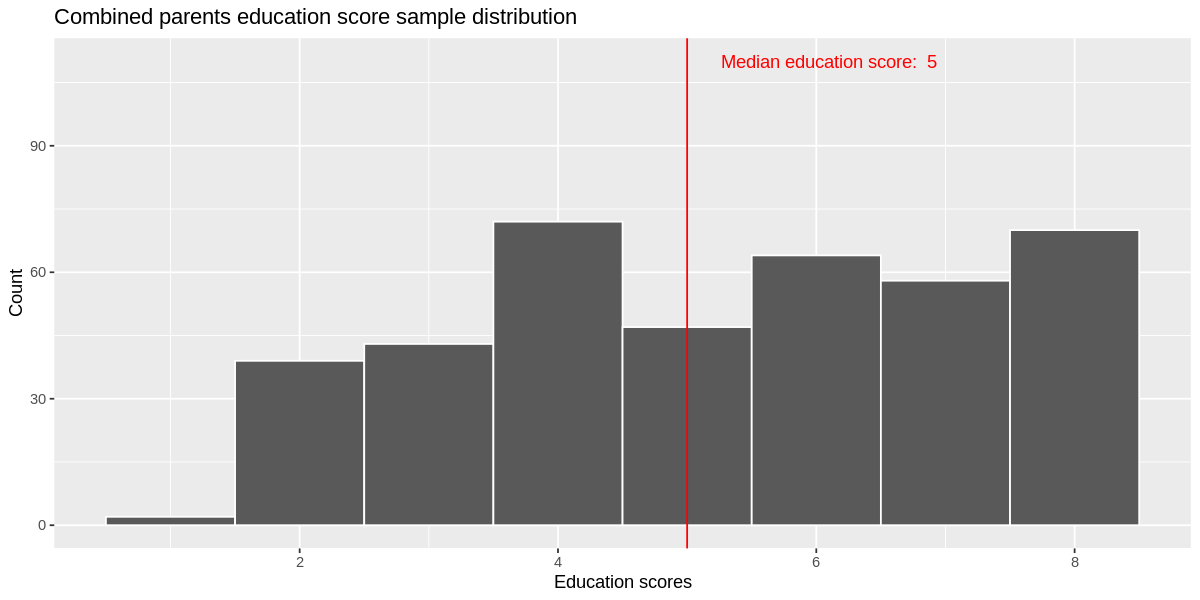

In [4]:
student_data_combined_edu <- student_data |>
    mutate(combined_education = father_education + mother_education)

combined_education_plot <- student_data_combined_edu |>
    ggplot(aes(x = combined_education)) +
    geom_histogram(binwidth = 1, color = 'white') +
    geom_vline(aes(xintercept = median(combined_education)), color = 'red') +
    annotate("text", label = paste("Median education score: ", round(median(student_data_combined_edu$combined_education), digits = 2)), 
             x = median(student_data_combined_edu$combined_education) + 1.1, y = 110, color = 'red') +
    ggtitle("Combined parents education score sample distribution") +
    xlab("Education scores") +
    ylab("Count")

combined_education_plot

# todo justify why we pick median instead of mean this time, why we do 5, and talk about how well the number split is
It is not statistically correct to assume that post-secondary is the educational standard in this data, therefore, we wanted to analyze the distributions of average education level to determine our basis for what counts as a high-education.  As measured in the preliminary results above, we received that the average education level of a parent is approximate $2.6$ (for both father and mother), so using the $\geq 6$ as a basis would consider both parents that have received secondary education or higher (slightly above-average education), as **well-educated**.  


In [15]:
# student_data_combined_edu$parents_education[student_data_combined_edu$combined_education <= 5] <- "less"
# student_data_combined_edu$parents_education[student_data_combined_edu$combined_education > 5] <- "well"

# final_student_data <- student_data_combined_edu |>
#     select(-combined_education)

final_student_data <- student_data_combined_edu |>
    mutate(parents_education = ifelse(combined_education <= 5, "less", "well")) |>
    select(term_1_grade, term_2_grade, final_grade, parents_education)

final_student_data |> group_by(parents_education) |>
    summarize(count = n())

final_student_data

parents_education,count
<chr>,<int>
less,203
well,192


term_1_grade,term_2_grade,final_grade,parents_education
<dbl>,<dbl>,<dbl>,<chr>
5,6,6,well
5,5,6,less
7,8,10,less
15,14,15,well
6,10,10,well
15,15,15,well
12,12,11,less
6,5,6,well
16,18,19,less


Referring again to the documentation [(1)](#ref_1), the all three of a student's grades are integers in the interval $[0, 20]$.
Below are plots of the distribution of students' first, second, and final grades:

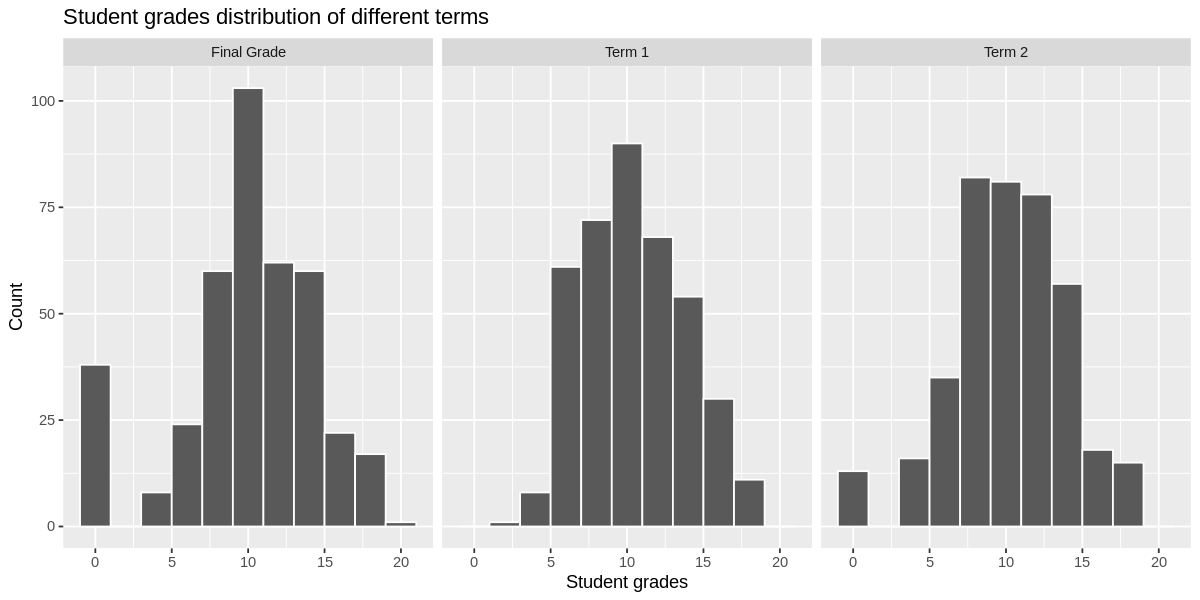

In [16]:
options(repr.plot.width = 10, repr.plot.height = 5)

labels = c(`term_1_grade` = "Term 1", `term_2_grade` = "Term 2", `final_grade` = "Final Grade")

student_grade_plots <- final_student_data |>
    pivot_longer(names_to = "term", values_to = "grade", cols = c(term_1_grade, term_2_grade, final_grade)) |>
    ggplot(aes(x = grade)) +
    facet_wrap(vars(term), labeller = as_labeller(labels)) +
    geom_histogram(binwidth = 2, color = 'white') +
    ggtitle("Student grades distribution of different terms") +
    xlab("Student grades") +
    ylab("Count")

student_grade_plots

Seen from the three plots above, it seems that most of the distributions seem relatively normal with center around $10$. However, looking at `Final Grade` and `Term 2`, there appears to be an increasing frequency for grades of $0$. Below is an overview of those with a final grade of $0$:

In [17]:
final_student_data |>
    filter(final_grade == 0) |>
    mutate(average_term_grades = (term_1_grade + term_2_grade)/2) |>
    select(term_1_grade, term_2_grade, final_grade) |>
    head(10)

term_1_grade,term_2_grade,final_grade
<dbl>,<dbl>,<dbl>
7,4,0
12,0,0
8,0,0
9,0,0
11,0,0
10,0,0
4,0,0
7,9,0
5,0,0


Observing the overview, it can be seen that those with a final grade of $0$ tend to also have "relatively poorer" grades in the preceding two terms. As the significance of $0$ wasn't documented in the original data, it's difficult to determine whether it represents missing/null data or other holistic factor such as failing by not reaching a certain cutoff. Due to this uncertainty, the mean of all three grades will be used to represents the student's grade to mitigate severe skewness. Below is the distribution of the final grades and the mean grades of students:

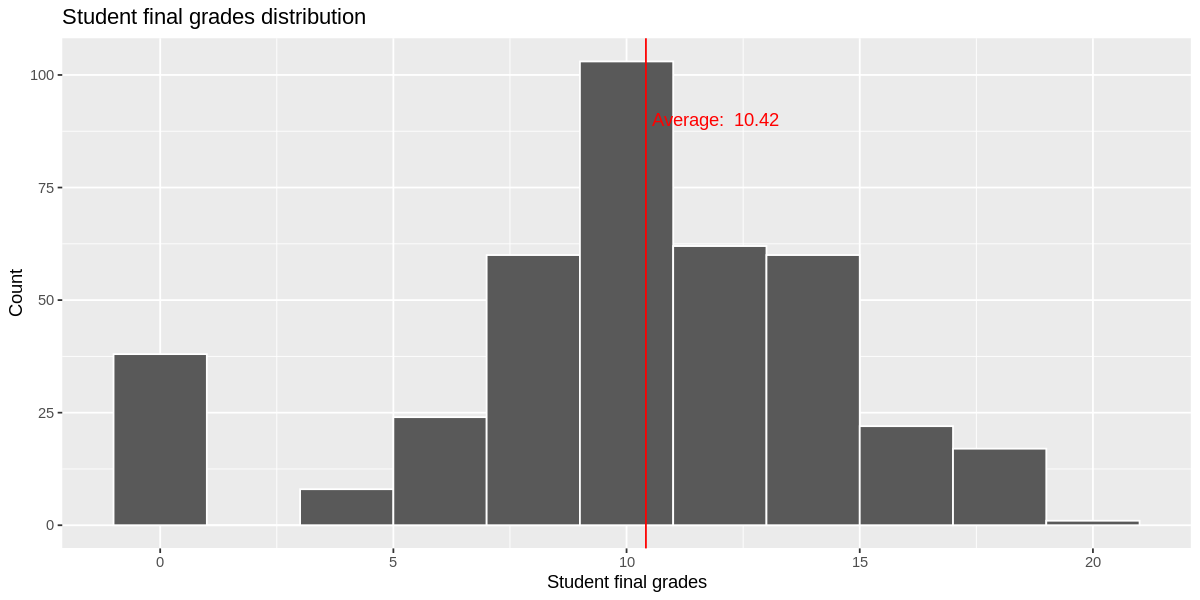

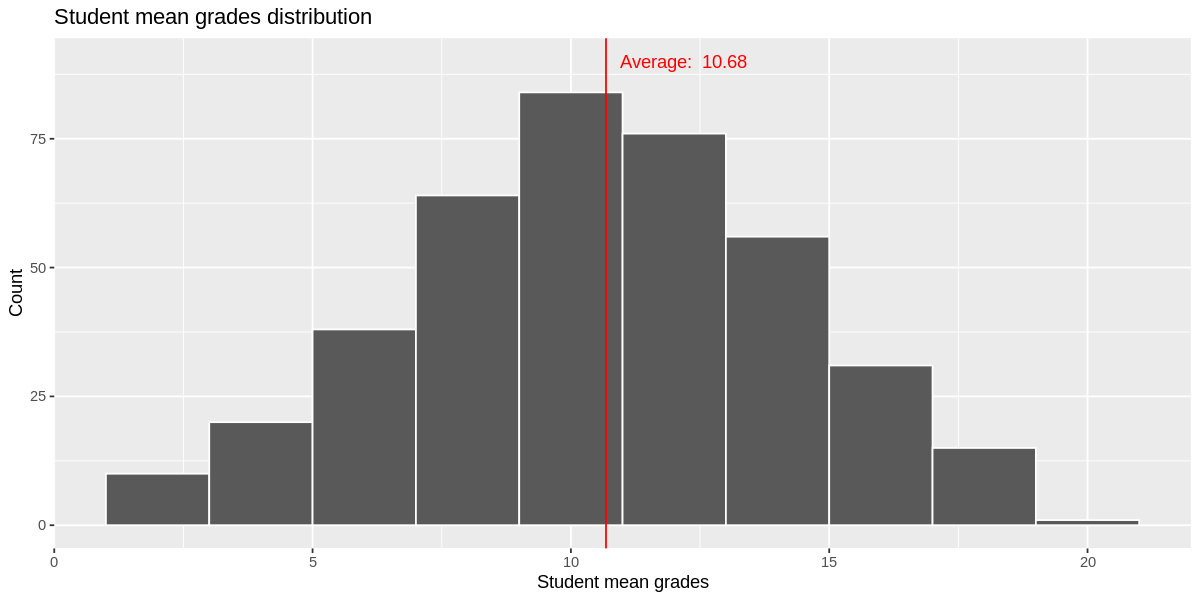

In [18]:
# plot final grades only
student_final_grade_plot <- final_student_data |>
    ggplot(aes(x = final_grade)) +
    geom_histogram(binwidth = 2, color = 'white') +
    geom_vline(aes(xintercept = mean(final_grade)), color = 'red') +
    annotate("text", label = paste("Average: ", round(mean(final_student_data$final_grade), digits = 2)), 
             x = mean(final_student_data$final_grade) + 1.5, y = 90, color = 'red') +
    ggtitle("Student final grades distribution") +
    xlab("Student final grades") +
    ylab("Count")

student_final_grade_plot


# find average grades and plot
average_student_data <- final_student_data |>
    mutate(average_grade = (term_1_grade + term_2_grade + final_grade) / 3)

student_average_grade_plot <- average_student_data |>
    ggplot(aes(x = average_grade)) +
    geom_histogram(binwidth = 2, color = 'white') +
    geom_vline(aes(xintercept = mean(average_grade)), color = 'red') +
    annotate("text", label = paste("Average: ", round(mean(average_student_data$average_grade), digits = 2)), 
             x = mean(average_student_data$average_grade) + 1.5, y = 90, color = 'red') +
    ggtitle("Student mean grades distribution") +
    xlab("Student mean grades") +
    ylab("Count")

student_average_grade_plot

Comparing the two distributions seen above, both centers seems to be similar while the mean grades does not appear to have any outliers. In addition, the range appears very similar, about $20$. Due to the absence of outliers (i.e. the $0$ data), it is reasonable to continue the analysis by using the average grade to avoid further assumptions.

# Further analysis and results

### Preliminary  Information

- It is not statistically correct to assume that post-secondary is the educational standard in this data, therefore, we wanted to analyze the distributions of average education level to determine our basis for what counts as a high-education.  As measured in the preliminary results above, we received that the average education level of a parent is approximate $2.6$ (for both father and mother), so using the $\geq 6$ as a basis would consider both parents that have received secondary education or higher (slightly above-average education), as **well-educated**.  

- Analyzing our dataset, we found our students to have been sampled from 2 different schools, so it should be mentioned that there could be some potential bias from schools for the `average_term_grade` of students that can skew our results, however, our goal is to test parental education levels and whether it affects the student's performance in mathematics and not to consider the outside education environment within these factors.  Therefore in our project, it is assumed that both schools provide the same education level (even though it can be a major factor in determining student performance).  

- The student dataset does not mention a value for the standard deviation for the population of student performances, it is assumed that the sample's standard deviation will closely approximate the population's standard deviation when creating our results.  The results will also have an asymptotic approach as we have a fairly large sample size, a normal distribution of mean student performance, and we are estimating the sample means of student performances; which will allow us to explore the results asymptotically.


### Expectations/Impacts/Future Questions.
 
 Through statistical analysis and inference, we expect to find if there exists sufficient evidence to prove/disprove whether the parent's (combined) education level plays a critical role in a student's performance in mathematics, which will lead to a better understanding in the social dynamic of a family.  The importance of parental education and its effect on a child's intellectual development for other subjects will be questioned.  Questions of should more/less parent's be seeking higher education and what will better help a child's intellectual development will arise.


do hypotehssiss test below
# todo calculate with theory and compare with bootstrapped p value

parents_education,average_grade
<chr>,<dbl>
well,5.666667
less,5.333333
less,8.333333
well,14.666667
well,8.666667
well,15.000000


Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


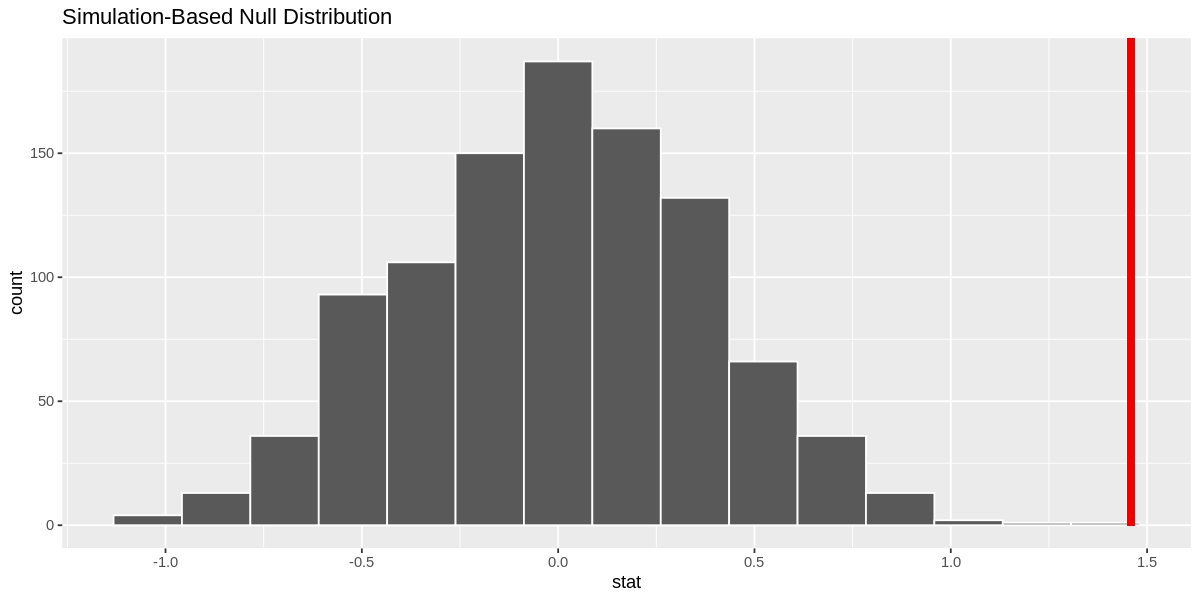

In [19]:
# select relevant data
obs_data <- average_student_data |>
    select(parents_education, average_grade)
head(obs_data)

obs_stat <- obs_data |>
    specify(average_grade ~ parents_education) |>
    calculate(stat = "diff in means", order = c("well", "less"))

# null model
results <- specify(obs_data, formula = average_grade ~ parents_education) |>
    hypothesize(null = "independence") |>
    generate(type = "permute", reps = 1000) |>
    calculate(stat = "diff in means", order = c("well", "less"))


results |> visualize() + shade_p_value(obs_stat, direction = "greater")

get_p_value(results, obs_stat, direction = "greater")

# Discussion

duiscussion here

# References

1. <a id='ref_1'></a> Cortez,Paulo. (2014). Student Performance. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T.

2. <a id='ref_2'></a> Herts, J. B., Beilock, S. L., & Levine, S. C. (2019). The role of parents’ and teachers’ math anxiety in Children’s math learning and attitudes. In I. C. Mammarella, S. Caviola & A. Dowker (Eds.), *Mathematics anxiety* (1st ed., pp. 190-210). Routledge. https://doi.org/10.4324/9780429199981-11

3. <a id='ref_3'></a> Dr. Muhammad Idris, Dr. Sajjad Hussain, & Dr. Nasir Ahmad. (2020). Relationship between Parents’ Education and their children’s Academic Achievement. Journal of Arts & Social Sciences , 7(2), 82-92. https://doi.org/10.46662/jass-vol7-iss2-2020(82-92)